In [ ]:
!pip install -U scikit-learn
!pip install pandas
!pip install joblib
!pip install numpy

In [ ]:
# libraries
import numpy as np
import pandas as pd
import os
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from joblib import load, dump

In [ ]:
# Data cleanup
df = pd.read_csv("dataset.csv")
df = df.fillna(0)

df['km'] = df['km'].str.replace(',', '.')

indexAge = df[ (df['km'].str.strip() == '')].index
df.drop(indexAge , inplace=True)

df = df[df['automovel'] != " "]

<ipython-input-140-2df82859a0e2>:2: DtypeWarning: Columns (9,12,16,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("dataset.csv")


In [ ]:
# creating the category: gravidade_do_acidente

temp_num = df["levemente_feridos"] + (df["moderadamente_feridos"] * 2) \
  + (df["gravemente_feridos"] * 3) + (df["mortos"] * 5)

conditions = [
    (temp_num <= 1),
    (temp_num > 2) & (temp_num <= 5),
    (temp_num > 5) & (temp_num <= 10),
    (temp_num > 15)
    ]
categories = ["Leve", "Médio", "Grave", "Super Grave"]
df["gravidade_do_acidente"] = np.select(conditions, categories)


In [ ]:
# Training

data = df[["km", "automovel"]]
target = df["gravidade_do_acidente"]

X = pd.DataFrame(data)
Y = pd.DataFrame(target)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.01, random_state=800)

model = DecisionTreeClassifier(max_depth=12, min_samples_split=10)
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)

In [ ]:
# Test
print(f"Accuracy: {(accuracy * 100):.5f}")

Accuracy: 83.12883


array([[   2,    0,  115,    1,    0],
       [   1,    0,   16,    0,    0],
       [   9,    1, 1082,    0,    0],
       [   0,    0,   76,    0,    0],
       [   0,    0,    1,    0,    0]])

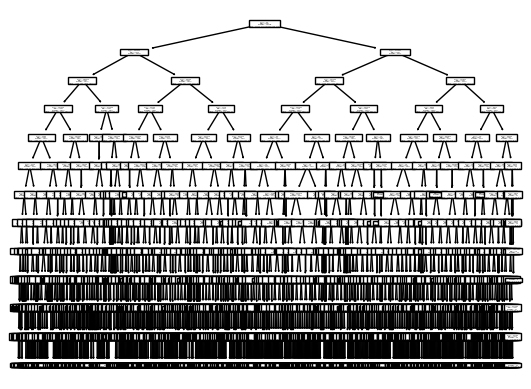

In [ ]:
#Tree and Confusion Matrix

plot_tree(model)
confusion_matrix(Y_test, Y_pred)